In [5]:
import os                                                   # import library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
len(os.listdir('COVID-19_Radiography_Dataset/COVID/images'))       # lenth of  dataset(covid images)

3616

In [7]:
len(os.listdir('COVID-19_Radiography_Dataset/Normal/images')) # lenth of dataset (normal images)

10192

In [8]:
img= cv2.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-10001.png') # show images

In [9]:
img.shape

(299, 299, 3)

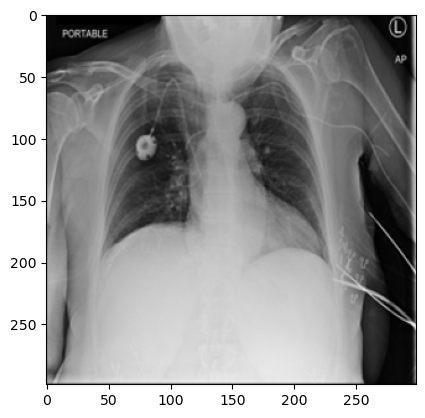

In [10]:
plt.imshow(img)

In [11]:
import pandas as pd
import numpy as np

In [12]:
df= pd.read_excel('COVID-19_Radiography_Dataset/COVID.metadata.xlsx')        # read covid matadeta Sexcel file
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [13]:
urls =os.listdir('COVID-19_Radiography_Dataset/COVID/images') # get url covid images

In [15]:
path ='COVID-19_Radiography_Dataset/COVID/images' + urls[0]  ##url 0 index , path covid images

In [16]:
path

'COVID-19_Radiography_Dataset/COVID/imagesCOVID-1.png'

In [17]:
def loadImages(path,urls, target):              # create a load images  function
  images =[]
  labels= []
  for i in range(len(urls)):
    img_path = path+ '/' +urls[i] # reading the images one by one
    img=cv2.imread(img_path)
    img= img/255.0
    img = cv2.resize(img, (100,100))        #       resize images
    images.append(img)
    labels.append(target)
  images =np.asarray(images)
  return images,labels

In [18]:
covid_path ='COVID-19_Radiography_Dataset/COVID/images'
covidUrl =os.listdir('COVID-19_Radiography_Dataset/COVID/images')
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)  (#1 is  infected)) # call the fumction loadImages

In [19]:
import numpy as np

In [22]:
 len(covidImages), len(covidUrl)

(3616, 3616)

In [23]:
normal_path ='COVID-19_Radiography_Dataset/Normal/images'
normal_urls=os.listdir(normal_path)
normalImages, normalTargest =loadImages(normal_path, normal_urls, 0)

In [24]:
covidImages =np.asarray(covidImages)
normalImages =np.asarray(normalImages)

In [25]:
covidImages.shape

(3616, 100, 100, 3)

In [26]:
normalImages.shape

(10192, 100, 100, 3)

In [27]:
data = np.r_[covidImages, normalImages] # add norlmal images shep and covid image shape

In [28]:
data.shape

(13808, 100, 100, 3)

In [29]:
tagets= np.r_[covidTargets, normalTargest]

In [30]:
tagets.shape

(13808,)

In [31]:
from  sklearn.model_selection import train_test_split

In [32]:
x_train,x_test, y_train,y_test= train_test_split(data, tagets, test_size=0.25)

In [ ]:
# crate a model cnn covid detection

In [33]:
model= Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation ='relu'),
    MaxPooling2D(),
    Conv2D(16, 3,  activation ='relu'),
    MaxPooling2D(),
    Conv2D(16, 3,  activation ='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation ='sigmoid')


])

In [34]:
model.summary()         # model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 16)        0

In [35]:
model.compile(optimizer ='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics= ['accuracy'])        # compile the model

In [36]:
model.fit(x_train,y_train,batch_size= 32, epochs=8, validation_data=(x_test,y_test))

Epoch 1/8
324/324 [==============================] - 81s 238ms/step - loss: 0.4209 - accuracy: 0.8018 - val_loss: 0.3528 - val_accuracy: 0.8236
Epoch 2/8
324/324 [==============================] - 76s 235ms/step - loss: 0.2984 - accuracy: 0.8687 - val_loss: 0.2716 - val_accuracy: 0.8847
Epoch 3/8
324/324 [==============================] - 80s 247ms/step - loss: 0.2584 - accuracy: 0.8909 - val_loss: 0.2744 - val_accuracy: 0.8789
Epoch 4/8
324/324 [==============================] - 75s 232ms/step - loss: 0.2139 - accuracy: 0.9143 - val_loss: 0.2136 - val_accuracy: 0.9180
Epoch 5/8
324/324 [==============================] - 70s 216ms/step - loss: 0.1815 - accuracy: 0.9280 - val_loss: 0.1820 - val_accuracy: 0.9279
Epoch 6/8
324/324 [==============================] - 71s 220ms/step - loss: 0.1543 - accuracy: 0.9401 - val_loss: 0.1884 - val_accuracy: 0.9198
Epoch 7/8
324/324 [==============================] - 67s 207ms/step - loss: 0.1346 - accuracy: 0.9477 - val_loss: 0.1718 - val_accuracy:

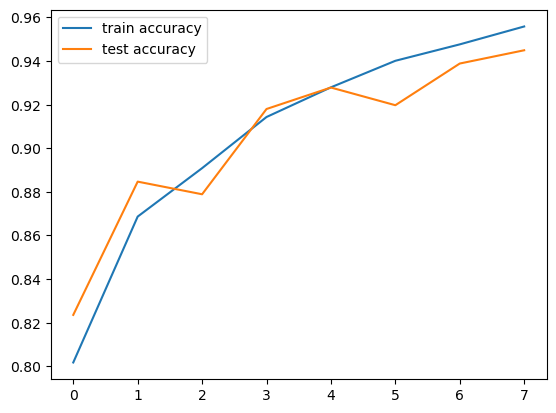

In [37]:
plt.plot(model.history.history['accuracy'], label ='train accuracy')
plt.plot(model.history.history['val_accuracy'], label ='test accuracy')
plt.legend()
plt.show()